# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [20]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [22]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [24]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [25]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [26]:
df.query('converted==1').nunique()['user_id']/df['user_id'].nunique()

0.12104245244060237

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [27]:
(df.query('(group=="treatment" and landing_page!= "new_page") or (group=="control" and landing_page!= "old_page")')).count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

**f.** Do any of the rows have missing values?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [29]:
(df.user_id.count()==df.timestamp.count()==df.group.count()==df.landing_page.count()==df.converted.count()).all()

True

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [35]:
def drop_rows(indexs):
     """function to drop rows from the dataframe 

    Parameters:
    indexs (arr): array of rows indexs to drop
    
   """
    for i in range(len(indexs)):
        df.drop(indexs[i],inplace=True)

In [36]:
indexs=df.query('(group=="treatment" and landing_page!= "new_page") or (group=="control" and landing_page!= "old_page")').index
drop_rows(indexs)
df2=df


In [37]:
df2.query('(group=="treatment" and landing_page!= "new_page") or (group=="control" and landing_page!= "old_page")').count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [38]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [39]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [40]:
df2.loc[df2.duplicated(subset=['user_id']), :]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [41]:
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [42]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2=df2.drop(index=1899)
# Check again if the row with a duplicate user_id is deleted or not
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [43]:
df2.query('converted==1')['converted'].sum()/len(df2['converted'])

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [44]:
ctrl_conv=df2.query('group=="control" and converted==1')['converted'].sum()/len(df2.query('group=="control"')['converted'])
ctrl_conv

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [45]:
treat_conv=df2.query('group=="treatment" and converted==1')['converted'].sum()/len(df2.query('group=="treatment"')['converted'])
treat_conv

0.11880806551510564

In [46]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= treat_conv - ctrl_conv
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [47]:
(df.landing_page== 'new_page').sum()/len(df.landing_page)

0.5000636646764286

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**For control users the conversions is 0.1203863045004612 and for treatment users we find out that it is 0.11880806551510564 which means that the conversions decreased but from practical statistical perspective it wasn't a big difference since the difference only 0.0015782389853555567 , So, No treatment doesn't lead to more conversions.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

$$H_0: \mu_{old} - \mu_{new} \geq 0$$


$$H_1: \mu_{old} - \mu_{new} < 0$$


**$\mu_{old}$ and $\mu_{new}$ are the population mean values for old page and new page, respectivley.**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [48]:
tr_conv=df2.query('(group=="treatment" and converted==1) or (group=="control" and converted==1)')['converted'].sum()/len(df2['converted'])
tr_conv

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [49]:
ct_conv=df2.query('((group=="treatment" and converted==1) or (group=="control" and converted==0)) or((group=="treatment" and converted==0) or (group=="control" and converted==1)) ')['converted'].sum()/len(df2['converted'])
ct_conv

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [50]:
n_new=df2.query('group=="treatment"').user_id.count()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [51]:
n_old=df2.query('group=="control"').user_id.count()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [79]:
# Simulate a Sample for the treatment Group
new_page_converted=np.array(np.random.choice([0,1],10000,p=[1-tr_conv,tr_conv]))
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [80]:
# Simulate a Sample for the control Group
old_page_converted=np.array(np.random.choice([0,1],10000,p=[1-ct_conv,ct_conv]))
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [81]:
converted_diff= new_page_converted.mean() - old_page_converted.mean()
converted_diff

-0.002800000000000011


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [82]:
# Sampling distribution 
ctrl_means, treat_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = df2.sample(200, replace = True)
    ctrl_mean = bootsamp[bootsamp.group == 'treatment']['converted'].mean()
    treat_mean = bootsamp[bootsamp.group == 'control']['converted'].mean()
    # append the info 
    ctrl_means.append(ctrl_mean)
    treat_means.append(treat_mean)
    diffs.append(treat_mean - ctrl_mean)   
    

In [83]:
p_diffs=np.array(diffs).mean()
p_diffs

0.0016541375517985458

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

Text(0.5, 0, 'Difference in means of new page and old page')

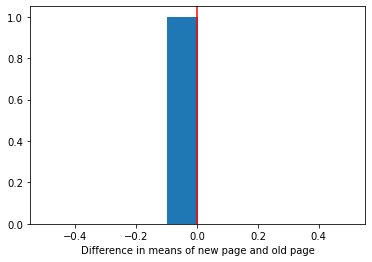

In [160]:
plt.hist(p_diffs)
plt.axvline(obs_diff,color='r');
plt.xlabel('Difference in means of new page and old page')

In [109]:
std_sample=np.std(diffs)

Text(0.5, 0, 'Difference in means of new page and old page')

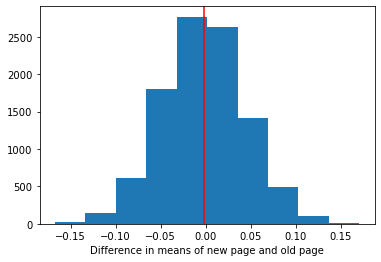

In [163]:
null_vals = np.random.normal(converted_diff, np.std(diffs), len(diffs))
plt.hist(null_vals);
plt.axvline(obs_diff,color='r');
plt.xlabel('Difference in means of new page and old page')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [145]:
(null_vals > obs_diff).mean()

0.4945

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**This value called p-value ,when the p-value is bigger than 0.05(Type I error rate) we stick with the null value(fail to reject the null) otherwise we reject the null.
in our case since the p-value larger than 0.05 we failed to reject the null**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [147]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('group=="control" and converted==1')['converted'].sum()


# number of conversions with the new_page
convert_new = df2.query('group=="treatment" and converted==1')['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2.query('group=="control"').user_id.count()

# number of individuals who received new_page
n_new = df2.query('group=="treatment"').user_id.count()

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 


The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 

In [170]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
count=[convert_old,convert_new]
nobs=[n_old,n_new]
z_score, p_value = sm.stats.proportions_ztest(count,nobs,alternative='larger')
print(z_score, p_value)

1.3109241984234394 0.09494168724097551


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**$Z_{0.05}$ is 1.645 and $Z_{score}$ is 1.3109 and since $Z_{0.05}$ is larger than  $Z_{score}$ we faild to reject the null**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic Regression since what we are trying to predict is the conversion(category) using the landing page(category).**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [180]:
df2['intercept']=1
df2['ab_page']=0
df2.loc[df2.group=="treatment",'ab_page']=1
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [184]:
mod=sm.Logit(df2.converted,df2[['intercept','ab_page']])
results=mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [186]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-10-09 14:09 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>**p-value is 0.1899 and it is one sided(right side) hypothesis since the null is $H_0: \mu_{old} - \mu_{new} \geq 0$
and the alternative is $H_1: \mu_{old} - \mu_{new} < 0$
the p-value is greater than 0.05 so we faild to reject the null.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**One of the factors we can include is the time put the disadvantages we will get related to the time is how to decide if that time is enoghe or not should we give the the users more time does that effect our results ,personaly I think it would .**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [192]:
# Read the countries.csv
df3=pd.read_csv('countries.csv')
df3.head(1)

,user_id,country
0,834778,UK


In [194]:
# Join with the df2 dataframe
df_merged=pd.DataFrame.join(df2,df3['country'])
df_merged

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,UK
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,UK
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,UK
...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,NaN
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,NaN
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,NaN
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,NaN


In [198]:
# Create the necessary dummy variables
df_merged[['CA','UK', 'US']]=pd.get_dummies(df_merged['country'])
df_merged.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0


In [199]:
df_merged=df_merged.drop(columns='UK')

In [200]:
df_merged.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [202]:
# Fit your model, and summarize the results
mod1=sm.Logit(df_merged.converted,df_merged[['intercept','ab_page','US','CA']])
res=mod1.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [203]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212783.1243
Date:               2021-10-09 15:09 BIC:              212825.4428
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.40026    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9836    0.0126  -158.0476  0.0000  -2.0082  -1.9590
ab_page      -0.0150    0.0114    -1.3088  0.1906  -0.0374   0.0074
US           -0.0052    0.0131    -0.3979  0.6907  -0.0310   0.0205
CA           -0.0313    0.0283    -1.1040  0.2696  -0.0868   0.0242
==================================================================

"""

In [204]:
df_merged.groupby('country').mean()['converted']

country
CA    0.116870
UK    0.120250
US    0.119586
Name: converted, dtype: float64

In [206]:
np.exp(res.params)

intercept    0.137567
ab_page      0.985146
US           0.994783
CA           0.969213
dtype: float64

**here we can see that the most conversions in the UK**

>**Since the p values for all parameter are greater than 0.05 that means they are not significant and there isn't effect related to the conversions.**

## conclusion

<strong>In the beginning, we found that the old page is better than the new one but in practical the value is very small (-0.0015782389853555567 ) less than 1% so there is no notable difference after that, we created two samples using choice method with the probability of them and found that the old page is better then we did a Sampling distribution for the difference in means for old and new pages and found that the new page is better and using the normal distribution we saw that the value we observed under the null(old page is better than the new page) and since the p-value is greater than 0.05 that indicates we failed to reject the null <br><br>final words:<br><br> Statically old page is better <br>Practically the difference is small and unnotable <br><br>recommendation:<br>
</strong>
<ul>
    <li><b>increase the duration of the study</b></li>
    <li><b>increase the number of users if possible</b></li>
</ul>
